## Parameterized Quantum Circuit(PQC):

### Data Encoding

### Quantum Circuit

In [1]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from pqc import PQC_Forecast

### Training - Data Preparation

In [2]:
TRAIN_TEST_RATIO = 8 / 10

In [ ]:
# Preprocess the data
new_filepath, min_value, max_value, initial_value = (
    PQC_Forecast.preprocess_data(
        filepath="../data/paper-data.csv",
        difference=False,
        scale_to_range=True,
        training_data_cutoff=TRAIN_TEST_RATIO,
    )
)
# Load the data
X, y = PQC_Forecast.load_data(filepath=new_filepath)

# Split the data into training and testing sets
train_test_split_index = int(len(X) * TRAIN_TEST_RATIO)
train_X, train_y, test_X, test_y = (
    X[:train_test_split_index],
    y[:train_test_split_index],
    X[train_test_split_index:],
    y[train_test_split_index:],
)

[-0.00059919 -0.02905389  0.02770964  0.02765494  0.00123568 -0.00084617
  0.17358489 -0.01717442  0.04161294 -0.04567055 -0.00514412  0.01306708
  0.0657647  -0.02355091  0.04944473  0.08185261 -0.03180869  0.12638859
  0.09590841 -0.07455951  0.25       -0.17406889  0.17889559 -0.0098316 ]
[ 0.04489815 -0.1276019   0.12392883  0.1117046  -0.1419461   0.01016807
 -0.028429  ]


### Training - Model Creation and Training

In [4]:
N_WIRES = 12
N_LAYERS = 2

In [5]:
# Create LBFGS-B model
pqc_model_lbfgsb = PQC_Forecast(
    n_wires=N_WIRES, n_layers=N_LAYERS, optimizer="L-BFGS-B"
)
# Create the COBYLA model
pqc_model_cobyla = PQC_Forecast(
    n_wires=N_WIRES, n_layers=N_LAYERS, optimizer="COBYLA"
)

In [6]:
# Train the models
pqc_model_lbfgsb.train(train_X, train_y)
pqc_model_cobyla.train(train_X, train_y)

KeyboardInterrupt: 

In [ ]:
# save weights
pqc_model_lbfgsb.save_weights("../weights/pqc_weights_lbfgsb.npy")
pqc_model_cobyla.save_weights("../weights/pqc_weights_cobyla.npy")

In [7]:
# load weights
pqc_model_lbfgsb.load_weights("../weights/pqc_weights_lbfgsb.npy")
pqc_model_cobyla.load_weights("../weights/pqc_weights_cobyla.npy")

True

In [ ]:
# Draw circuits
pqc_model_lbfgsb.draw_circuit()
pqc_model_cobyla.draw_circuit()

### Prediction + Analysis

In [11]:
# Predict the dataset as whole
predictions_L = pqc_model_lbfgsb.predict(X)
predictions_C = pqc_model_cobyla.predict(X)

In [12]:
# Compute the Training MSE with processed data
mse_L = np.mean((predictions_L[:train_test_split_index] - train_y) ** 2)
mse_C = np.mean((predictions_C[:train_test_split_index] - train_y) ** 2)
print(f"Training MSE L-BFGS-B: {mse_L}")
print(f"Training MSE COBYLA: {mse_C}")
# Compute Testing MSE
mse_L = np.mean((predictions_L[train_test_split_index:] - test_y) ** 2)
mse_C = np.mean((predictions_C[train_test_split_index:] - test_y) ** 2)
print(f"Testing MSE L-BFGS-B: {mse_L}")
print(f"Testing MSE COBYLA: {mse_C}")

Training MSE L-BFGS-B: 0.004288775586416771
Training MSE COBYLA: 0.005599549793777868
Testing MSE L-BFGS-B: 0.011969983879400011
Testing MSE COBYLA: 0.009690624175123605


In [13]:
# Post process the predictions
predictions_L = PQC_Forecast.post_process_data(
    predictions_L, min_value, max_value, initial_value
)
predictions_C = PQC_Forecast.post_process_data(
    predictions_C, min_value, max_value, initial_value
)
# Post process y
y = PQC_Forecast.post_process_data(y, min_value, max_value, initial_value)

Text(0.5, 1.0, 'PQC Time-Series Forecasting')

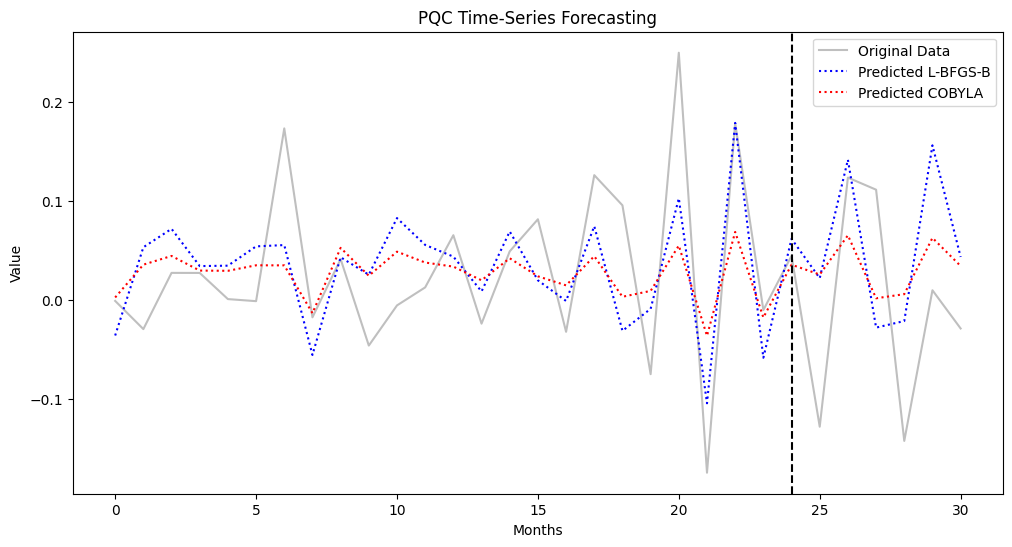

In [14]:
# Plot the predictions
plt.figure(figsize=(12, 6))
# plot the original data as grey line
plt.plot(range(len(y)), y, label="Original Data", color="grey", alpha=0.5)
# plot the predicted data as dotted blue line
plt.plot(
    range(len(predictions_L)),
    predictions_L,
    label="Predicted L-BFGS-B",
    color="blue",
    linestyle="dotted",
)
plt.plot(
    range(len(predictions_C)),
    predictions_C,
    label="Predicted COBYLA",
    color="red",
    linestyle="dotted",
)

# label the x and y axis
plt.xlabel("Months")
plt.ylabel("Value")
# enable legend
plt.legend()

# mark the split between training and testing data
plt.axvline(x=train_test_split_index, color="black", linestyle="--")
plt.title("PQC Time-Series Forecasting")